In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'D:\archive\train.csv')

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.shape

(8523, 12)

In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [10]:
df['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

#### Univariate Imputation

In [11]:
df['Item_Weight'].mean()

12.857645184135976

In [12]:
df['Item_Weight'].median()

12.6

In [13]:
df['item_weight_mean']=df['Item_Weight'].fillna(df['Item_Weight'].mean())
df['item_weight_median']=df['Item_Weight'].fillna(df['Item_Weight'].median())

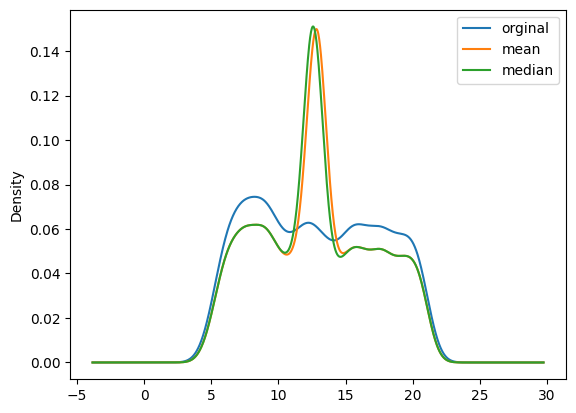

In [14]:
df['Item_Weight'].plot(kind='kde',label='orginal')
df['item_weight_mean'].plot(kind='kde',label='mean')
df['item_weight_median'].plot(kind='kde',label='median')
plt.legend()
plt.show()

In [15]:
df['item_weight_interpolate']=df['Item_Weight'].interpolate(method='linear')

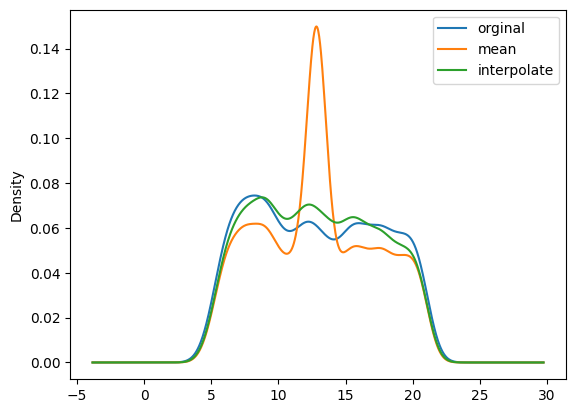

In [16]:
df['Item_Weight'].plot(kind='kde',label='orginal')
df['item_weight_mean'].plot(kind='kde',label='mean')
df['item_weight_interpolate'].plot(kind='kde',label='interpolate')
plt.legend()
plt.show()

#### Multivariate Imputation

In [17]:
from sklearn.impute import KNNImputer
knn= KNNImputer(n_neighbors=10,weights='distance')

In [18]:
df['knn_imputer']= knn.fit_transform(df[['Item_Weight']]).ravel()

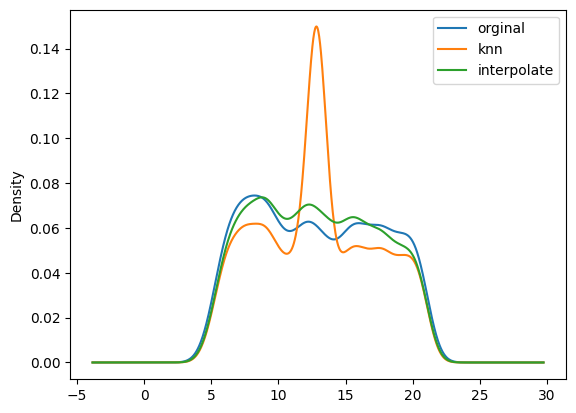

In [19]:
df['Item_Weight'].plot(kind='kde',label='orginal')
df['knn_imputer'].plot(kind='kde',label='knn')
df['item_weight_interpolate'].plot(kind='kde',label='interpolate')
plt.legend()
plt.show()

Interpolation is the best method

In [20]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].interpolate(method='linear'))

In [21]:
df=df.drop(['item_weight_interpolate','knn_imputer','item_weight_mean','item_weight_median'],axis=1)

In [22]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Outlet Size

In [23]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [24]:
df['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [25]:
mode_outlet = df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [26]:
mode_outlet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [27]:
missing_values = df['Outlet_Size'].isnull()

In [28]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [29]:
df.loc[missing_values,'Outlet_Size'] = df.loc[missing_values,'Outlet_Type'].apply(lambda x :mode_outlet[x])

In [30]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### Fat content

In [31]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [32]:
df.replace({'Item_Fat_Content':{'Low Fat':'LF','low fat':'LF','reg':'Regular'}},inplace=True)

In [33]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
LF         5517
Regular    3006
Name: count, dtype: int64

#### Item Visibility

In [34]:
df['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [35]:
df['Item_Visibility_interpolate']=df['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')

In [36]:
df['Item_Visibility_interpolate'].value_counts()

Item_Visibility_interpolate
0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: count, Length: 8405, dtype: int64

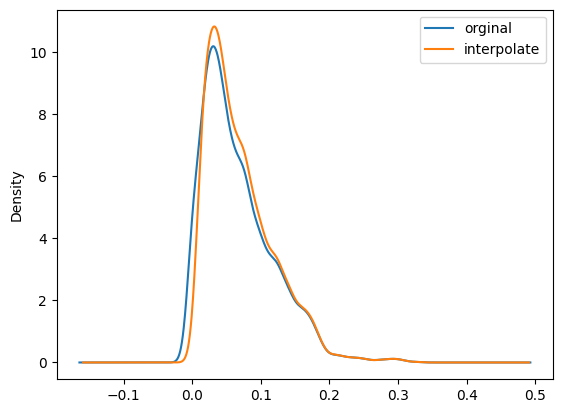

In [37]:
df['Item_Visibility'].plot(kind='kde',label='orginal')
df['Item_Visibility_interpolate'].plot(kind='kde',label='interpolate')
plt.legend()
plt.show()

In [37]:
df =df.drop('Item_Visibility',axis=1)

In [38]:
df.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_interpolate
0,FDA15,9.3,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,0.016047


#### Item Identifier

In [39]:
df['Item_Identifier'].value_counts().sample(5)

Item_Identifier
FDI58    4
FDV43    3
FDN40    4
FDC46    7
FDO33    1
Name: count, dtype: int64

In [40]:
df['Item_Identifier']=df['Item_Identifier'].apply(lambda x: x[:2])

In [41]:
df['Item_Identifier'].value_counts()

Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

#### Outlet Age

In [42]:
import datetime as dt

In [43]:
current_year =dt.datetime.today().year

In [44]:
df['outlet_age']=current_year-df['Outlet_Establishment_Year']

In [45]:
df=df.drop('Outlet_Establishment_Year',axis=1)

In [46]:
df.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_interpolate,outlet_age
0,FD,9.3,LF,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.138,0.016047,24


#### Handling Categorical Data

In [47]:
from sklearn.preprocessing import OrdinalEncoder
data_encoded = df.copy()
cat_cols = df.select_dtypes(include = ['object']).columns
for col in cat_cols:
    oe = OrdinalEncoder()
    data_encoded[col]=oe.fit_transform(data_encoded[[col]])
    print(oe.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['LF', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [48]:
x= data_encoded.drop('Item_Outlet_Sales',axis=1)
y=data_encoded['Item_Outlet_Sales']

#### Random Forest Regressor

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
rf = RandomForestRegressor(n_estimators=100,random_state=42)
scores= cross_val_score(rf,x,y,cv=5,scoring='r2')
print(scores.mean())

0.5553462078981306


#### XGBRF Regressor

In [52]:
from xgboost import XGBRFRegressor
xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores= cross_val_score(xg,x,y,cv=5,scoring='r2')
print(scores.mean())

0.5951900167316244


In [53]:
xg = XGBRFRegressor(n_estimators=100,random_state=42)
xg1 = xg.fit(x,y)
pd.DataFrame({
    'feature':x.columns,
    'importance':xg1.feature_importances_
}).sort_values(by='importance',ascending= False)

,feature,importance
8,Outlet_Type,0.414256
10,outlet_age,0.176561
4,Item_MRP,0.149522
5,Outlet_Identifier,0.138610
6,Outlet_Size,0.104382
7,Outlet_Location_Type,0.008578
9,Item_Visibility_interpolate,0.002831
1,Item_Weight,0.002224
3,Item_Type,0.001482
0,Item_Identifier,0.000845


In [54]:
['Item_Fat_Content','Item_Identifier','Item_Type','Item_Weight','Item_Visibility_interpolate','Outlet_Location_Type']

['Item_Fat_Content',
 'Item_Identifier',
 'Item_Type',
 'Item_Weight',
 'Item_Visibility_interpolate',
 'Outlet_Location_Type']

In [56]:
scores= cross_val_score(xg1,x.drop(['Item_Fat_Content','Item_Identifier','Item_Type','Item_Weight','Item_Visibility_interpolate','Outlet_Location_Type'],axis=1),y,cv=5,scoring='r2')
print(scores.mean())

0.5966037632320667


In [57]:
final_data = x.drop(columns=['Item_Fat_Content','Item_Identifier','Item_Type','Item_Weight','Item_Visibility_interpolate','Outlet_Location_Type'],axis=1)

In [58]:
final_data

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,outlet_age
0,249.8092,9.0,1.0,1.0,24
1,48.2692,3.0,1.0,2.0,14
2,141.6180,9.0,1.0,1.0,24
3,182.0950,0.0,2.0,0.0,25
4,53.8614,1.0,0.0,1.0,36
...,...,...,...,...,...
8518,214.5218,1.0,0.0,1.0,36
8519,108.1570,7.0,2.0,1.0,21
8520,85.1224,6.0,2.0,1.0,19
8521,103.1332,3.0,1.0,2.0,14


#### Model

In [59]:
xg_final = XGBRFRegressor()
xg_final.fit(final_data,y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [61]:
x_train,x_test,y_train,y_test=train_test_split(final_data,y,test_size=0.2,random_state=42)

In [62]:
xg_final.fit(x_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [63]:
y_pred=xg_final.predict(x_test)

In [64]:
mean_absolute_error(y_test,y_pred)

713.9516489619299

#### Saving Model

In [65]:
import joblib

In [66]:
joblib.dump(xg_final,'sayeem_model')

['sayeem_model']

In [ ]:
import numpy as np
import datetime as dt
from tkinter import *
import joblib
current_year = dt.datetime.today().year
def show_entry_fields():
    p1=float(e1.get())
    text = clicked.get()
    if text == "OUT010":
        p2=0
        print(p2)
    elif text=="OUT013":
        p2=1
        print(p2)
    elif text=="OUT017":
        p2=2
        print(p2)
    elif text=="OUT018":
        p2=3
        print(p2)
    elif text=="OUT019":
        p2=4
        print(p2)
    elif text=="OUT027":
        p2=5
        print(p2)
    elif text=="OUT035":
        p2=6
        print(p2)
    elif text=="OUT045":
        p2=7
        print(p2)
    elif text=="OUT046":
        p2=8
        print(p2)
    elif text=="OUT049":
        p2=9
        print(p2)
    text0 = clicked0.get()
    if text0 == "High":
        p3=0
        print(p3)
    elif text0=="Medium":
        p3=1
        print(p3)
    elif text0=="Small":
        p3=2
        print(p3)
    text1 = clicked1.get()
    if text1 == "Supermarket Type1":
        p4=1
        print(p4)
    elif text1=="Supermarket Type2":
        p4=2
        print(p4)
    elif text1=="Supermarket Type3":
        p4=3
        print(p4)
    elif text1=="Grocery Store":
        p4=0
        print(p4)
    p5=current_year - int(e5.get())
    print(p5)
    
    model = joblib.load('sayeem_model')
    result=model.predict(np.array([[p1,p2,p3,p4,p5]]))
    Label(master, text="Sales").grid(row=8)
    Label(master, text=result).grid(row=10)
    print("Sales amount", result)

master = Tk()
master.title("Sayeem Supershop Sales Prediction")


label = Label(master, text = " Sayeem Supershop Sales Prediction "
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)
Label(master, text="Item_MRP").grid(row=1)
Label(master, text="Outlet_Identifier").grid(row=2)
Label(master, text="Outlet_Size").grid(row=3)
Label(master, text="Outlet_Type").grid(row=4)
Label(master, text="Outlet_Establishment_Year").grid(row=5)

clicked = StringVar()
options = ['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049']

clicked0 = StringVar()

options0 = ['High', 'Medium', 'Small']

clicked1 = StringVar()
options1 = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3']

e1 = Entry(master)

e2 = OptionMenu(master , clicked , *options )
e2.configure(width=15)


e3 = OptionMenu(master , clicked0 , *options0 )
e3.configure(width=15)


e4 = OptionMenu(master , clicked1 , *options1 )
e4.configure(width=15)

e5 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()
        


4
0
1
23
Sales amount [4128.7173]
4
0
1
8
Sales amount [4060.9883]
